In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
WaterDF = pd.read_csv('WaterFlowDataSet.csv',encoding='latin-1')

In [7]:
WaterDF.head()

,Transit Time1 (ns),Transit Time2 (ns),Dtime(ns),Diameter Pipe (mm),Temperature(°C),Propogation Distance (mm),Angle of Propagation(°),Velocity of Sound in water (m/s),Total Volume Collected (Litre)
0,57811.04,57811.79,0.76,25,13,38,50,1401,13.21
1,57811.01,57811.89,0.88,25,14,38,50,1426,15.16
2,57811.10,57811.80,0.70,25,13,38,50,1403,12.12
3,57810.99,57811.99,1.01,25,15,38,50,1389,17.21
4,57811.03,57811.85,0.82,25,15,38,50,1390,13.85


In [8]:
WaterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transit Time1 (ns)                24 non-null     float64
 1   Transit Time2 (ns)                24 non-null     float64
 2   Dtime(ns)                         24 non-null     float64
 3   Diameter Pipe (mm)                24 non-null     int64  
 4   Temperature(°C)                   24 non-null     int64  
 5   Propogation Distance (mm)         24 non-null     int64  
 6   Angle of Propagation(°)           24 non-null     int64  
 7   Velocity of Sound in water (m/s)  24 non-null     int64  
 8   Total Volume Collected (Litre)    24 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 1.8 KB


In [9]:
WaterDF.describe()

,Transit Time1 (ns),Transit Time2 (ns),Dtime(ns),Diameter Pipe (mm),Temperature(°C),Propogation Distance (mm),Angle of Propagation(°),Velocity of Sound in water (m/s),Total Volume Collected (Litre)
count,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000
mean,57769.172917,57853.415833,84.276667,25.0,22.458333,38.500000,49.000000,1442.916667,63.099583
std,43.302389,42.920261,86.185659,0.0,8.054052,0.510754,1.021508,43.802836,50.157495
min,57718.130000,57811.790000,0.700000,25.0,13.000000,38.000000,48.000000,1389.000000,12.120000
25%,57731.302500,57811.880000,0.865000,25.0,15.000000,38.000000,48.000000,1400.750000,14.720000
50%,57774.195000,57848.750000,74.540000,25.0,21.000000,38.500000,49.000000,1450.500000,57.165000
75%,57811.010000,57890.650000,159.332500,25.0,28.500000,39.000000,50.000000,1478.500000,105.377500
max,57811.970000,57904.130000,185.860000,25.0,37.000000,39.000000,50.000000,1500.000000,125.250000


In [14]:
WaterDF.columns

Index(['Transit Time1 (ns)', 'Transit Time2 (ns)', 'Dtime(ns)',
       'Diameter Pipe (mm)', 'Temperature(°C)', 'Propogation Distance (mm)',
       'Angle of Propagation(°)', 'Velocity of Sound in water (m/s)',
       'Total Volume Collected (Litre)'],
      dtype='object')

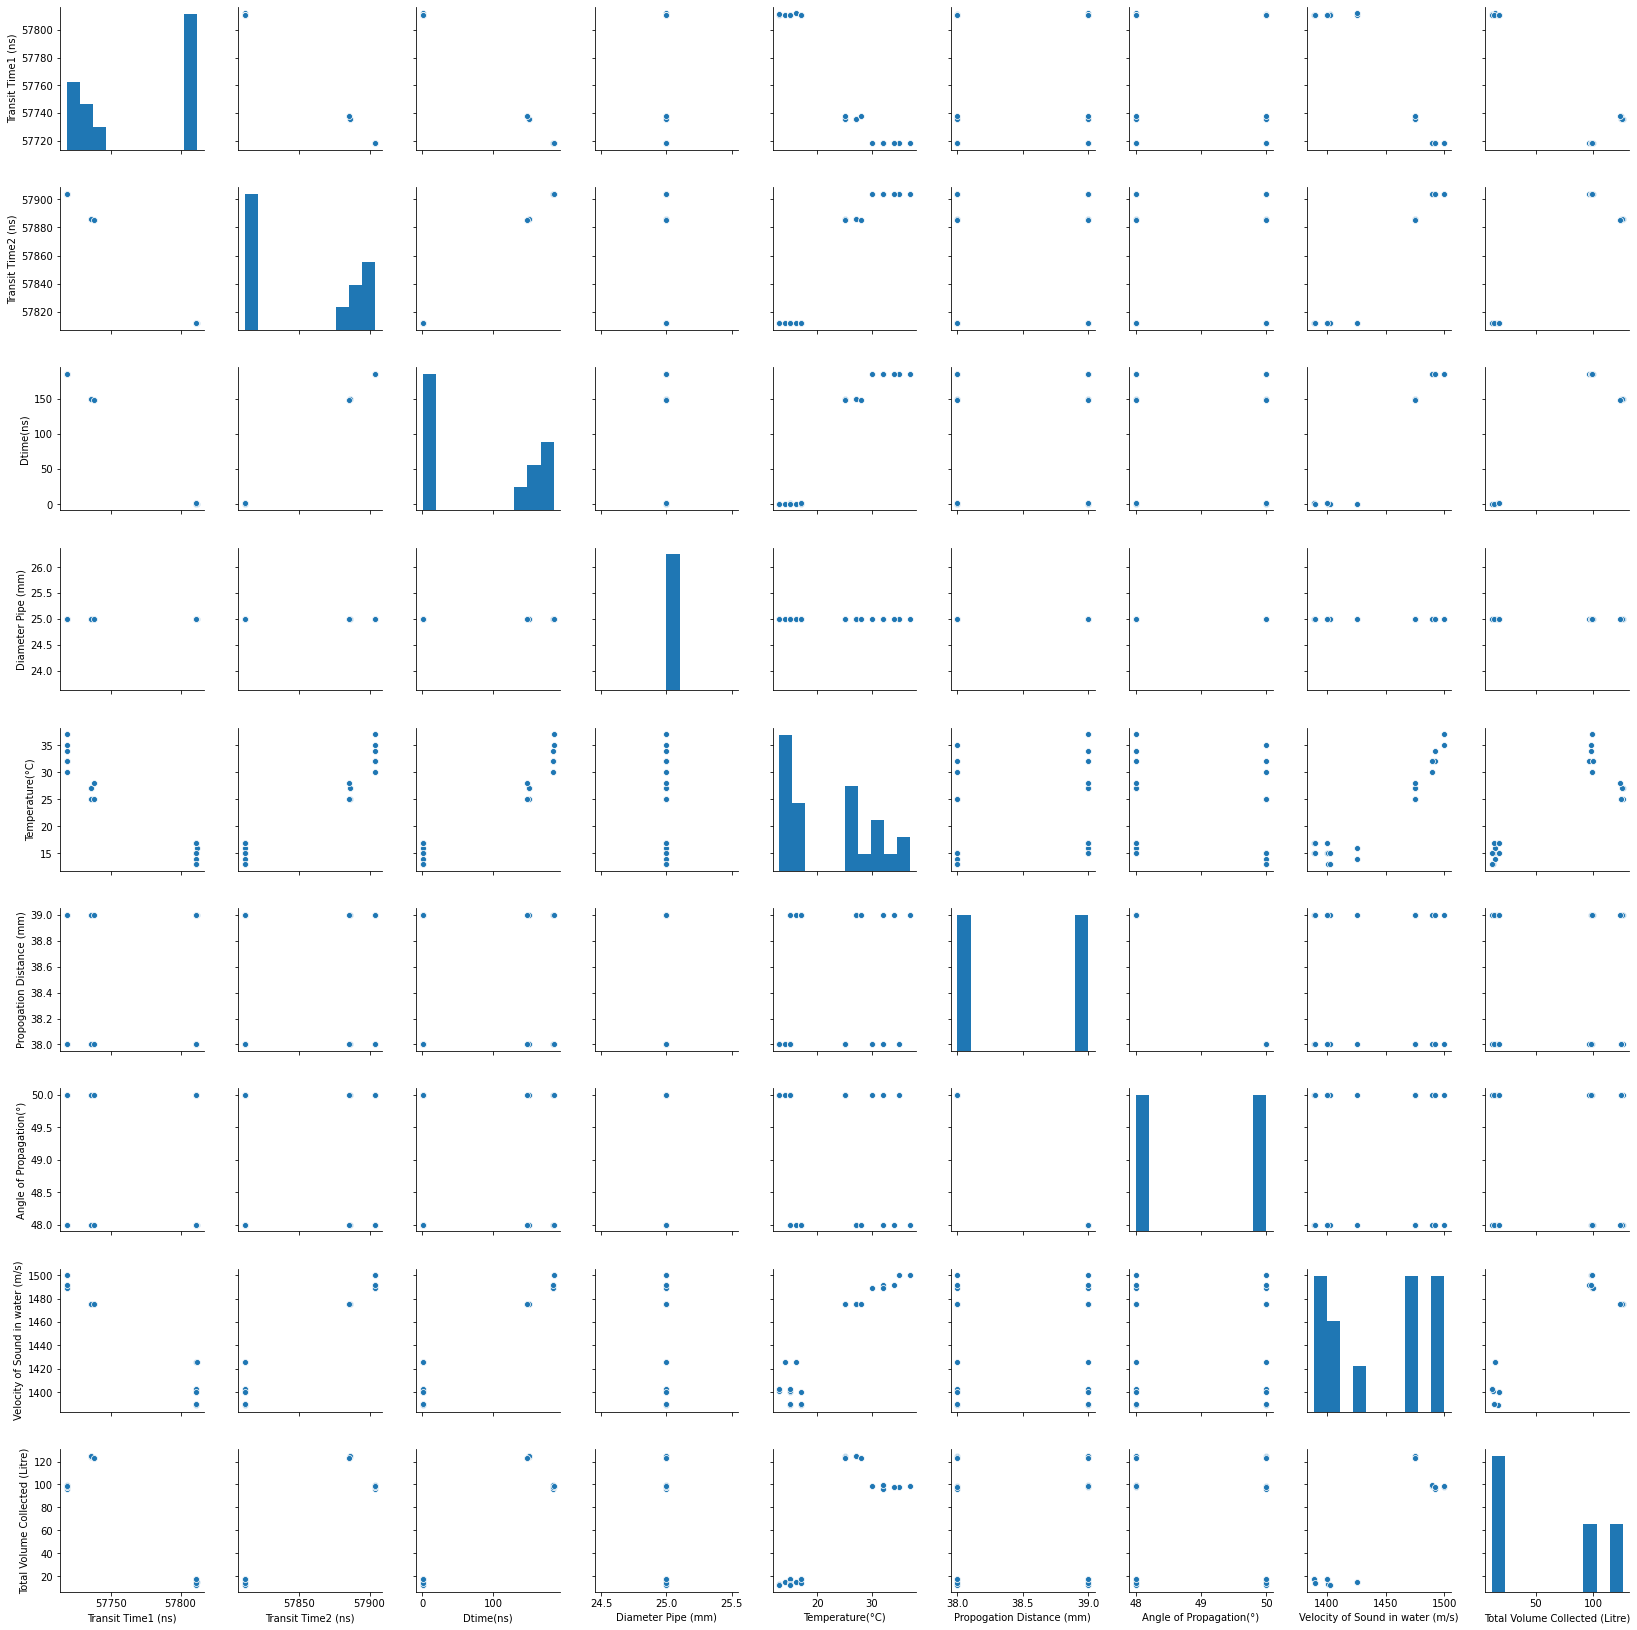

In [15]:
sns.pairplot(WaterDF)

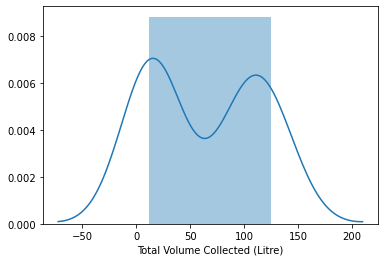

In [16]:
sns.distplot(WaterDF['Total Volume Collected (Litre)'])

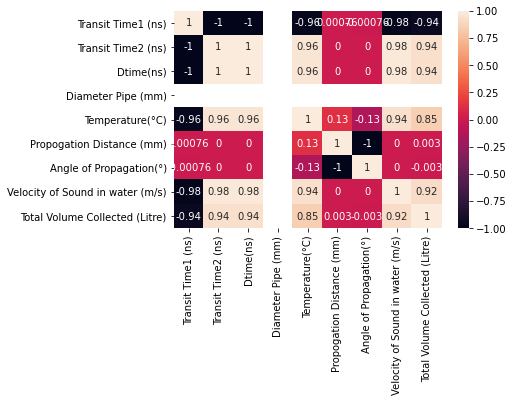

In [17]:
sns.heatmap(WaterDF.corr(), annot=True)

In [18]:
X = WaterDF[['Transit Time1 (ns)', 'Transit Time2 (ns)', 'Dtime(ns)',
       'Diameter Pipe (mm)', 'Temperature(°C)', 'Propogation Distance (mm)',
       'Angle of Propagation(°)', 'Velocity of Sound in water (m/s)']]

y = WaterDF['Total Volume Collected (Litre)']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
print(lm.intercept_)

-1248675.5359976755


In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Transit Time1 (ns),-8.827819e+00
Transit Time2 (ns),3.042539e+01
Dtime(ns),-1.866930e+01
Diameter Pipe (mm),-6.306067e-14
Temperature(°C),-5.529694e+00
Propogation Distance (mm),1.535077e+00
Angle of Propagation(°),-3.070154e+00
Velocity of Sound in water (m/s),2.010203e-01


In [26]:
predictions = lm.predict(X_test)

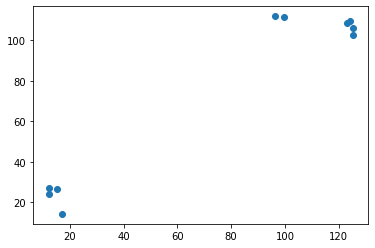

In [27]:
plt.scatter(y_test,predictions)

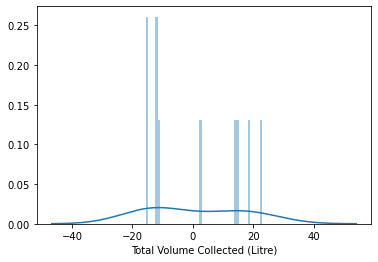

In [28]:
sns.distplot((y_test-predictions),bins=50);

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 13.958651750299149
MSE: 219.29501774777071
RMSE: 14.808612958267588
